In [332]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_file = os.path.join("data","city_data.csv")
city_df = pd.read_csv(city_file)
ride_file = os.path.join("data","ride_data.csv")
ride_df = pd.read_csv(ride_file)

city_df.head()



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [333]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [334]:
# Combine the data into a single dataset
merge_df = pd.merge(city_df,ride_df,on="city",how="left")
merge_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [335]:
#city Type Counts
city_type = city_df.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [336]:
# Average Fare per City
average_fare = merge_df.groupby("city")["fare"].mean()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [337]:
#Rides per city
total_rides = merge_df.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

## Bubble Plot of Ride Sharing Data

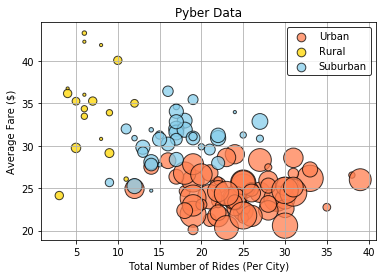

In [338]:
# Obtain the x and y coordinates for each of the three city types

urban_type = merge_df[merge_df["type"] == "Urban"].groupby([merge_df["city"]])
rural_type = merge_df[merge_df["type"] == "Rural"].groupby([merge_df["city"]])
suburban_type = merge_df[merge_df["type"] == "Suburban"].groupby([merge_df["city"]])

urban_x = urban_type["ride_id"].count()
urban_y = urban_type["fare"].mean()
urban_s = urban_type["driver_count"].mean()

rural_x = rural_type["ride_id"].count()
rural_y = rural_type["fare"].mean()
rural_s = rural_type["driver_count"].mean()

suburban_x = suburban_type["ride_id"].count()
suburban_y = suburban_type["fare"].mean()
suburban_s = suburban_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x,suburban_y, label = "Suburban", s=suburban_s  * 10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Data")


# Create a legend
legend = plt.legend(fontsize = 8, title= "City Type", loc="best") 

#Adjust legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Save figure 
plt.savefig("PyberScatter.png", bbox_inches="tight")


In [339]:
# Show plot
plt.show()

## Total Fares by City Type

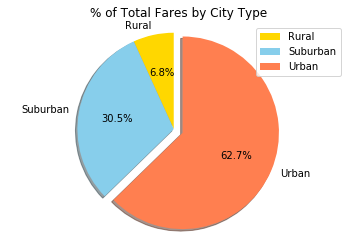

In [340]:
# Calculate total number of fares per city type
type_groups = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = type_groups.sum()['fare']


# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]

plt.pie(fare_sum, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=90)

plt.axis('equal')
plt.title('% of Total Fares by City Type')

#Add the legend.
plt.legend(loc = "upper right")

#Save figure
plt.savefig("PyberFarePie.png")

In [341]:
# Show Figure
plt.show()


## Total Rides by City Type

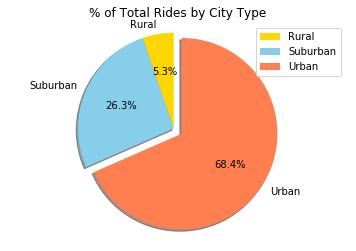

In [342]:
# Calculate Ride Percent
ride_sum = type_groups.count()['ride_id']

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]

plt.pie(ride_sum, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=90)


plt.axis('equal')
plt.title('% of Total Rides by City Type')

#Add the legend.
plt.legend(loc = "upper right")

#Save figure
plt.savefig("PyberRidesPie.png")

In [343]:
# Show Figure
plt.show()



## Total Drivers by City Type

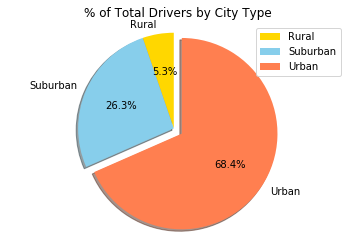

In [344]:
# Calculate Driver Percents
driver_sum = type_groups.count()['driver_count']

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]

plt.pie(ride_sum, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=90)


plt.axis('equal')
plt.title('% of Total Drivers by City Type')

#Add the legend.
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("PyberDriverPie.png")

In [345]:
# Show Figure
plt.show()